In [1]:
from server import LinkedViewsServer
data_folder = "/scratch/visual/bzfharth/in-silico-install-dir/project_src/in_silico_framework/getting_started/linked-views-example-data/backend_data_2023-06-22"

server = LinkedViewsServer(data_folder)
server.start(5000)

start read: simulation_samples_original.csv
complete read
start read: simulation_samples.csv
complete read
server is running at port 5000
logs are written to /tmp/linked-views-server.log
set data:        server.set_data(df)
stop server:     server.stop()


In [2]:
#server.stop()

In [3]:
import vaex

filename = "/scratch/visual/bzfharth/in-silico-install-dir/project_src/in_silico_framework/getting_started/linked-views-example-data/backend_data_2023-06-22/simulation_samples.csv"
df = vaex.from_csv(filename, copy_index=False)
df

#,Unnamed: 0,sample_idx_original,ephys.CaDynamics_E2_v2.apic.decay,ephys.CaDynamics_E2_v2.apic.gamma,ephys.CaDynamics_E2_v2.axon.decay,ephys.CaDynamics_E2_v2.axon.gamma,ephys.CaDynamics_E2_v2.soma.decay,ephys.CaDynamics_E2_v2.soma.gamma,ephys.Ca_HVA.apic.gCa_HVAbar,ephys.Ca_HVA.axon.gCa_HVAbar,ephys.Ca_HVA.soma.gCa_HVAbar,ephys.Ca_LVAst.apic.gCa_LVAstbar,ephys.Ca_LVAst.axon.gCa_LVAstbar,ephys.Ca_LVAst.soma.gCa_LVAstbar,ephys.Im.apic.gImbar,ephys.K_Pst.axon.gK_Pstbar,ephys.K_Pst.soma.gK_Pstbar,ephys.K_Tst.axon.gK_Tstbar,ephys.K_Tst.soma.gK_Tstbar,ephys.NaTa_t.apic.gNaTa_tbar,ephys.NaTa_t.axon.gNaTa_tbar,ephys.NaTa_t.soma.gNaTa_tbar,ephys.Nap_Et2.axon.gNap_Et2bar,ephys.Nap_Et2.soma.gNap_Et2bar,ephys.SK_E2.apic.gSK_E2bar,ephys.SK_E2.axon.gSK_E2bar,ephys.SK_E2.soma.gSK_E2bar,ephys.SKv3_1.apic.gSKv3_1bar,ephys.SKv3_1.apic.offset,ephys.SKv3_1.apic.slope,ephys.SKv3_1.axon.gSKv3_1bar,ephys.SKv3_1.soma.gSKv3_1bar,ephys.none.apic.g_pas,ephys.none.axon.g_pas,ephys.none.dend.g_pas,ephys.none.soma.g_pas,scale_apical.scale,bAP_APheight.check_1AP,bAP_APheight.normalized,bAP_APheight,bAP_APwidth.check_1AP,bAP_APwidth.normalized,bAP_APwidth,bAP_att2.raw,bAP_att2.check_1_AP,bAP_att2.check_relative_height,bAP_att2.normalized,bAP_att2,bAP_att3.raw,bAP_att3.check_1_AP,bAP_att3.check_relative_height,bAP_att3.normalized,bAP_att3,bAP_spikecount.raw,bAP_spikecount.normalized,bAP_spikecount,bAP.err,bAP.check_minspikenum,bAP.check_returning_to_rest,bAP.check_no_spike_before_stimulus,bAP.check_last_spike_before_deadline,1BAC_APheight.check_1AP,1BAC_APheight.normalized,1BAC_APheight,1BAC_ISI.check_2_or_3_APs,1BAC_ISI.check_repolarization,1BAC_ISI.raw,1BAC_ISI.normalized,1BAC_ISI,1BAC_ahpdepth.check_2AP,1BAC_ahpdepth.normalized,1BAC_ahpdepth,1BAC_caSpike_height.check_1_Ca_AP,1BAC_caSpike_height.check_>=2_Na_AP,1BAC_caSpike_height.check_ca_max_after_nth_somatic_spike,1BAC_caSpike_height.raw,1BAC_caSpike_height.normalized,1BAC_caSpike_height,1BAC_caSpike_width.check_1_Ca_AP,1BAC_caSpike_width.raw,1BAC_caSpike_width.normalized,1BAC_caSpike_width,1BAC_spikecount.raw,1BAC_spikecount.normalized,1BAC_spikecount,1BAC.err,1BAC.check_minspikenum,1BAC.check_returning_to_rest,1BAC.check_no_spike_before_stimulus,1BAC.check_last_spike_before_deadline,2BAC_APheight.check_1AP,2BAC_APheight.normalized,2BAC_APheight,2BAC_ISI.check_2_or_3_APs,2BAC_ISI.check_repolarization,2BAC_ISI.raw,2BAC_ISI.normalized,2BAC_ISI,2BAC_ahpdepth.check_2AP,2BAC_ahpdepth.normalized,...,BAC_Soma_charges.Ca_LVAst.ica,BAC_Soma_charges.SKv3_1.ik,BAC_Soma_charges.Ca_HVA.ica,BAC_Soma_charges.Ih.ihcn,BAC_Soma_charges.NaTa_t.ina,BAC_AIS_current_550ms.NaTa_t.ina,BAC_AIS_current_550ms.Ca_LVAst.ica,BAC_AIS_current_550ms.Ca_HVA.ica,BAC_AIS_current_550ms.Ih.ihcn,BAC_AIS_current_550ms.SKv3_1.ik,BAC_AIS_current_550ms.SK_E2.ik,BAC_AIS_current_250ms.NaTa_t.ina,BAC_AIS_current_250ms.Ca_LVAst.ica,BAC_AIS_current_250ms.Ca_HVA.ica,BAC_AIS_current_250ms.Ih.ihcn,BAC_AIS_current_250ms.SKv3_1.ik,BAC_AIS_current_250ms.SK_E2.ik,BAC_AIS_charges.SK_E2.ik,BAC_AIS_charges.Ca_LVAst.ica,BAC_AIS_charges.SKv3_1.ik,BAC_AIS_charges.Ca_HVA.ica,BAC_AIS_charges.Ih.ihcn,BAC_AIS_charges.NaTa_t.ina,BAC_prox_current_550ms.NaTa_t.ina,BAC_prox_current_550ms.Ca_LVAst.ica,BAC_prox_current_550ms.Ca_HVA.ica,BAC_prox_current_550ms.Ih.ihcn,BAC_prox_current_550ms.Im.ik,BAC_prox_current_550ms.SKv3_1.ik,BAC_prox_current_550ms.SK_E2.ik,BAC_prox_current_250ms.NaTa_t.ina,BAC_prox_current_250ms.Ca_LVAst.ica,BAC_prox_current_250ms.Ca_HVA.ica,BAC_prox_current_250ms.Ih.ihcn,BAC_prox_current_250ms.Im.ik,BAC_prox_current_250ms.SKv3_1.ik,BAC_prox_current_250ms.SK_E2.ik,BAC_prox_charges.SK_E2.ik,BAC_prox_charges.Im.ik,BAC_prox_charges.Ca_LVAst.ica,BAC_prox_charges.SKv3_1.ik,BAC_prox_charges.Ca_HVA.ica,BAC_prox_charges.Ih.ihcn,BAC_prox_charges.NaTa_t.ina,BAC_prox_charge,BAC_dist_current_550ms.NaTa_t.ina,BAC_dist_current_550ms.Ca_LVAst.ica,BAC_dist_current_550ms.Ca_HVA.ica,BAC_dist_current_550ms.Ih.ihcn,BAC_dist_current_550ms.Im.ik,BAC_dist_current_550ms.SKv3_1.

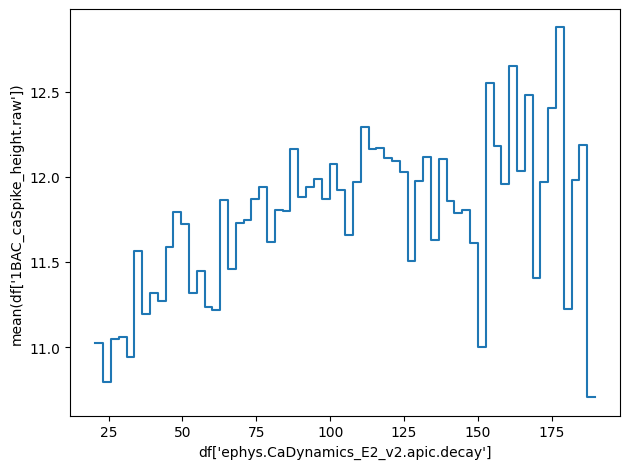

In [4]:
df_col = df["ephys.CaDynamics_E2_v2.apic.decay"]
df_col2 = df["1BAC_caSpike_height.raw"]
df.viz.histogram(df_col, what=vaex.stat.mean(df_col2), limits='99.7%')